In [3]:
import tensorflow as tf
import numpy as np
import random
from random import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# make a 2d array with [10 random numbers, the sum of the 10 random numbers]
def get_batch_sum():
    batch = [[]]
    total = 0
    for i in range(0,10):
        x = random.randint(1,10)
        batch[0].append([x*.1])
        total += x*.1
    return np.array(batch), [total]


# make a 2d array wish [the sinWave function on 10 numbers in a series, the sinWave of the next number in that series]
def get_batch_sin():
    batch = [[]]
    total = 0
    xr = random.randint(1,100)
    xarray = np.linspace(0,5,10)
    for i in range(0,11):
        x=np.sin(xr+xarray[i])
        y = np.sin(xr+xarray[i] + (xarray[1]-xarray[0]))
        batch[0].append([x])
        total += x
    return np.array(batch), [y]   
        

print(get_batch_sum())
    
print('train data loaded')

(array([[[ 0.7],
        [ 0.8],
        [ 1. ],
        [ 0.5],
        [ 0.6],
        [ 0.4],
        [ 0.4],
        [ 0.7],
        [ 0.9],
        [ 0.5]]]), [6.500000000000001])
train data loaded


In [2]:
with tf.variable_scope("greg", reuse=None) as scope:

    data = tf.placeholder(tf.float32, [None, 11,1]) #Number of examples, number of input, dimension of each input
    target = tf.placeholder(tf.float32, [1])
    num_hidden = 10
    cell1 = tf.nn.rnn_cell.LSTMCell(num_hidden, state_is_tuple=True)
    cell2 = tf.nn.rnn_cell.LSTMCell(num_hidden, state_is_tuple=True)
    cells=[]
    cells.append(cell1)
    cells.append(cell2)
    stacked_lstm = tf.nn.rnn_cell.MultiRNNCell(cells, state_is_tuple=True) # using multiple LSTM layers
    
    
    
    val, _ = tf.nn.dynamic_rnn(stacked_lstm, data, dtype=tf.float32)
    last = val[0,9:10,:] # this is the last 'slice' of the values from our neuralNet
    
    # add a readout layer to sum the results of the NN
    weight = tf.Variable(tf.truncated_normal([num_hidden,1]))
    bias = tf.Variable(tf.constant(0.1, shape=[1]))
    predictionLayer = tf.matmul(last, weight) + bias
    prediction = predictionLayer[0,:]
    
    # no classes used, just minimize the difference between actual and predicted
    loss = (tf.abs(target[0]-prediction))
    optimizer = tf.train.AdagradOptimizer(.01)
    train_step = optimizer.minimize(loss)
    

    # set up our session and train away!
    init_op = tf.initialize_all_variables()
    sess = tf.Session()
    sess.run(init_op)

    lossArray = []     # storing values in to arrays so we can display in graphs
    predictArray = []
    targetArray = []
    for i in range(0,2500):
        inp = get_batch_sum()
        sess.run(train_step,{data:inp[0],target:inp[1]})
        if(i%2==0):
            predict = sess.run(prediction,{data:inp[0],target:inp[1]})
            goal = sess.run(target[0],{data:inp[0],target:inp[1]})
            delta = sess.run(loss,{data:inp[0],target:inp[1]})
            lossArray.append(delta)
            predictArray.append(predict)
            targetArray.append(goal)
        if(i%100 ==0):
            delta = sess.run(loss,{data:inp[0],target:inp[1]})
            print('delta at trial ' +str(i)+': ' + str(delta))
            
    
    sess.close()

delta at trial 0: [ 5.18492985]
delta at trial 100: [ 0.80106211]
delta at trial 200: [ 1.63215971]
delta at trial 300: [ 0.55204725]
delta at trial 400: [ 0.4056468]
delta at trial 500: [ 0.82756805]
delta at trial 600: [ 0.09165907]
delta at trial 700: [ 1.55619049]
delta at trial 800: [ 0.79519892]
delta at trial 900: [ 0.45660496]
delta at trial 1000: [ 0.03304577]
delta at trial 1100: [ 1.2035017]
delta at trial 1200: [ 0.25152159]
delta at trial 1300: [ 0.13425541]
delta at trial 1400: [ 0.3061614]
delta at trial 1500: [ 0.41867971]
delta at trial 1600: [ 0.49642229]
delta at trial 1700: [ 0.47027159]
delta at trial 1800: [ 0.1961956]
delta at trial 1900: [ 0.30082178]
delta at trial 2000: [ 0.87393236]
delta at trial 2100: [ 0.06543589]
delta at trial 2200: [ 0.32571316]
delta at trial 2300: [ 0.35404778]
delta at trial 2400: [ 0.49520731]


Average delta between prediction and actual: 0.488009


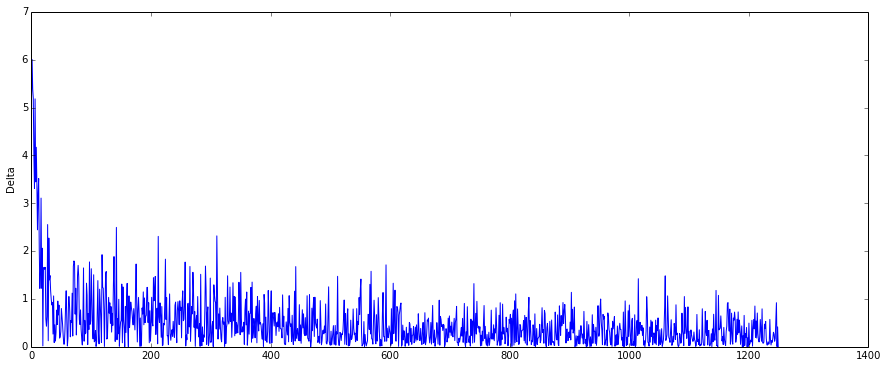

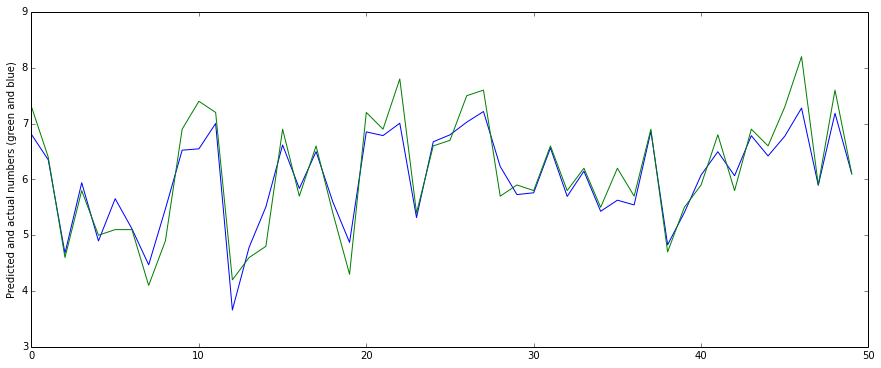

In [3]:
print('Average delta between prediction and actual: ' + str(np.mean(lossArray)))
plt.rcParams['figure.figsize'] = (15, 6)
plt.plot(lossArray)
plt.ylabel('Delta')
plt.show()

plt.ylabel('Predicted and actual numbers (green and blue)')
plt.plot(predictArray[1200:])
plt.plot(targetArray[1200:])